### Importing Required Libraries

In [2]:
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames
import matplotlib.pyplot as plt
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import seaborn as sns
# Show matplotlib plots inline (nicely formatted in the notebook)
%matplotlib inline
sns.set()

### Reading the data

In [6]:
# Read Breast Cancer Data
data=pd.read_csv("breast-cancer.csv")
data=data.drop(data.columns[0],axis=1)

In [7]:
# Read Header file
column_names= []
with open('field_names.txt', 'r') as f_names:
    for line in f_names:
        column_names.append(line.strip())
type(column_names)

list

### Insering column names for the data

In [8]:
# dropping first column
column_names.pop(0)

#Insert column names
data.columns=column_names

#Dimesnions of the data
data.shape

'ID'

(568, 31)

In [9]:
data.head()

,diagnosis,radius_mean,radius_sd_error,radius_worst,texture_mean,texture_sd_error,texture_worst,perimeter_mean,perimeter_sd_error,perimeter_worst,...,concavity_worst,concave_points_mean,concave_points_sd_error,concave_points_worst,symmetry_mean,symmetry_sd_error,symmetry_worst,fractal_dimension_mean,fractal_dimension_sd_error,fractal_dimension_worst
0,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
1,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
2,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
3,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
4,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,0.2087,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440


### Exploring the Target Variable

In [14]:
results=data.diagnosis
M=results[results=='M'].value_counts()
B=results[results=='B'].value_counts()
print(" Number of Patients with Malignant Tumor:   %d"%M)
print (" Number of Patients with Benign Tumor:   %d"%B)
print (" Percentage of Patients with Malignant Tumor:   {}:".format(100*M[0]/(M[0]+B[0])))

 Number of Patients with Malignant Tumor:   211
 Number of Patients with Benign Tumor:   357
 Percentage of Patients with Malignant Tumor:   37.147887323943664:


* Data is not very balanced

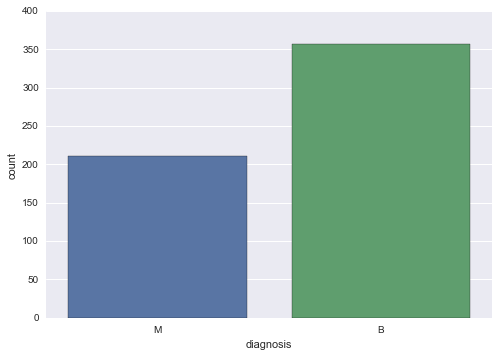

In [11]:
_ = sns.countplot(data.ix[:,0])

### Looking at the head of the data

In [330]:
data.head()

,"(diagnosis,)","(radius_mean,)","(radius_sd_error,)","(radius_worst,)","(texture_mean,)","(texture_sd_error,)","(texture_worst,)","(perimeter_mean,)","(perimeter_sd_error,)","(perimeter_worst,)",...,"(concavity_worst,)","(concave_points_mean,)","(concave_points_sd_error,)","(concave_points_worst,)","(symmetry_mean,)","(symmetry_sd_error,)","(symmetry_worst,)","(fractal_dimension_mean,)","(fractal_dimension_sd_error,)","(fractal_dimension_worst,)"
0,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
1,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
2,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
3,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678
4,M,12.45,15.70,82.57,477.1,0.12780,0.17000,0.1578,0.08089,0.2087,...,15.47,23.75,103.40,741.6,0.1791,0.5249,0.5355,0.1741,0.3985,0.12440


### Generating Bootstrap Samples

In [158]:
def boots(s):
    return data.sample(s)


number_of_bootstrap_samples=5
boots(number_of_bootstrap_samples)

,radius_mean,radius_sd_error,radius_worst,texture_mean,texture_sd_error,texture_worst,perimeter_mean,perimeter_sd_error,perimeter_worst,area_mean,...,concave_points_mean,concave_points_sd_error,concave_points_worst,symmetry_mean,symmetry_sd_error,symmetry_worst,fractal_dimension_mean,fractal_dimension_sd_error,fractal_dimension_worst,diagnosis
216,10.200,17.48,65.05,321.2,0.08054,0.05907,0.05774,0.01071,0.1964,0.06315,...,24.47,75.40,403.7,0.09527,0.13970,0.19250,0.03571,0.2868,0.07809,no
420,14.690,13.98,98.22,656.1,0.10310,0.18360,0.14500,0.06300,0.2086,0.07406,...,18.34,114.10,809.2,0.13120,0.36350,0.32190,0.11080,0.2827,0.09208,no
313,8.597,18.60,54.09,221.2,0.10740,0.05847,0.00000,0.00000,0.2163,0.07359,...,22.44,56.65,240.1,0.13470,0.07767,0.00000,0.00000,0.3142,0.08116,no
54,11.520,18.75,73.34,409.0,0.09524,0.05473,0.03036,0.02278,0.1920,0.05907,...,22.47,81.81,506.2,0.12490,0.08720,0.09076,0.06316,0.3306,0.07036,no
445,17.750,28.03,117.30,981.6,0.09997,0.13140,0.16980,0.08293,0.1713,0.05916,...,38.54,145.40,1437.0,0.14010,0.37620,0.63990,0.19700,0.2972,0.09075,yes


### Some basic statistics

In [331]:
display(data.describe())

,radius_mean,radius_sd_error,radius_worst,texture_mean,texture_sd_error,texture_worst,perimeter_mean,perimeter_sd_error,perimeter_worst,area_mean,...,concavity_worst,concave_points_mean,concave_points_sd_error,concave_points_worst,symmetry_mean,symmetry_sd_error,symmetry_worst,fractal_dimension_mean,fractal_dimension_sd_error,fractal_dimension_worst
count,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,...,568.00000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000,568.000000
mean,14.120491,19.305335,91.914754,654.279754,0.096321,0.104036,0.088427,0.048746,0.181055,0.062770,...,16.25315,25.691919,107.125053,878.578873,0.132316,0.253541,0.271414,0.114341,0.289776,0.083884
std,3.523416,4.288506,24.285848,351.923751,0.014046,0.052355,0.079294,0.038617,0.027319,0.007035,...,4.82232,6.141662,33.474687,567.846267,0.022818,0.156523,0.207989,0.065484,0.061508,0.018017
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.93000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.697500,16.177500,75.135000,420.175000,0.086290,0.064815,0.029540,0.020310,0.161900,0.057697,...,13.01000,21.095000,84.102500,514.975000,0.116600,0.146900,0.114475,0.064730,0.250350,0.071412
50%,13.355000,18.855000,86.210000,548.750000,0.095865,0.092525,0.061400,0.033455,0.179200,0.061515,...,14.96500,25.425000,97.655000,685.550000,0.131300,0.211850,0.226550,0.099840,0.282050,0.080015
75%,15.780000,21.802500,103.875000,782.625000,0.105300,0.130400,0.129650,0.073730,0.195625,0.066120,...,18.76750,29.757500,125.175000,1073.500000,0.146000,0.337600,0.381400,0.161325,0.317675,0.092065
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,36.04000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


Check for missing values

In [624]:
data.isnull().sum() 

(diagnosis,)                     0
(radius_mean,)                   0
(radius_sd_error,)               0
(radius_worst,)                  0
(texture_mean,)                  0
(texture_sd_error,)              0
(texture_worst,)                 0
(perimeter_mean,)                0
(perimeter_sd_error,)            0
(perimeter_worst,)               0
(area_mean,)                     0
(area_sd_error,)                 0
(area_worst,)                    0
(smoothness_mean,)               0
(smoothness_sd_error,)           0
(smoothness_worst,)              0
(compactness_mean,)              0
(compactness_sd_error,)          0
(compactness_worst,)             0
(concavity_mean,)                0
(concavity_sd_error,)            0
(concavity_worst,)               0
(concave_points_mean,)           0
(concave_points_sd_error,)       0
(concave_points_worst,)          0
(symmetry_mean,)                 0
(symmetry_sd_error,)             0
(symmetry_worst,)                0
(fractal_dimension_m

NO missing values in the dataset.

* Compute the mean and median smoothness and compactness for benign and malignant tumors - do they differ? Explain how you would identify this.

In [741]:
print(" Mean smoothness of benign Tumor   :{}".format(data.smoothness_mean[data.diagnosis=='M'].mean()))
print(" Mean smoothness of malignant Tumor   :{}".format(data.smoothness_mean[data.diagnosis=='B'].mean()))
print(" Mean compactness of benign Tumor   :{}".format(data.compactness_mean[data.diagnosis=='M'].mean()))
print(" Mean compactness of malignant Tumor   :{}".format(data.compactness_mean[data.diagnosis=='B'].mean()))

 Mean smoothness of benign Tumor   :4.30371563981043
 Mean smoothness of malignant Tumor   :2.0003212885154085
 Mean compactness of benign Tumor   :0.03220173933649289
 Mean compactness of malignant Tumor   :0.02143824649859945


In [744]:
print(" Median smoothness of benign Tumor   :{}".format(data.smoothness_mean[data.diagnosis=='M'].median()))
print(" Median smoothness of malignant Tumor   :{}".format(data.smoothness_mean[data.diagnosis=='B'].median()))
print(" Median compactness of benign Tumor   :{}".format(data.compactness_mean[data.diagnosis=='M'].median()))
print(" Median compactness of malignant Tumor   :{}".format(data.compactness_mean[data.diagnosis=='B'].median()))

 Median smoothness of benign Tumor   :3.654
 Median smoothness of malignant Tumor   :1.851
 Median compactness of benign Tumor   :0.02855
 Median compactness of malignant Tumor   :0.016309999999999998


* The mean is greater than the median in all the cases. This is common for a distribution that is skewed to the right

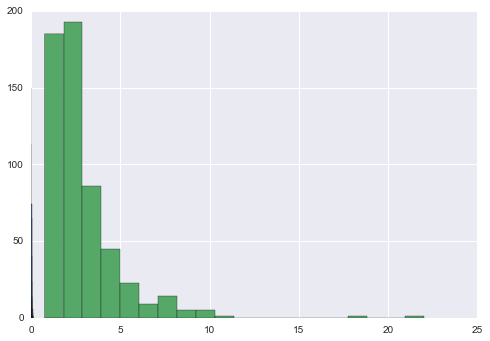

In [759]:
data.smoothness_mean.hist(bins=20)

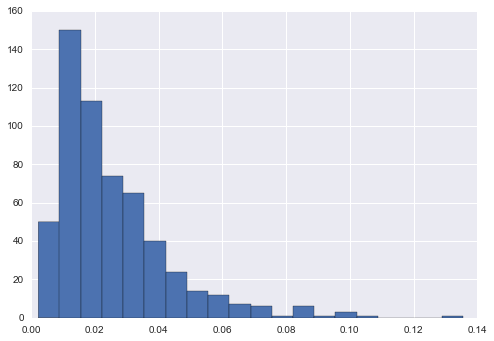

In [760]:
data.compactness_mean.hist(bins=20)

###  Possible Transformations

* Log Transformation
* Box-Cox Transformation

### Effect of parameters: radius_mean and symmetry_worst


**Effect of radius_mean**

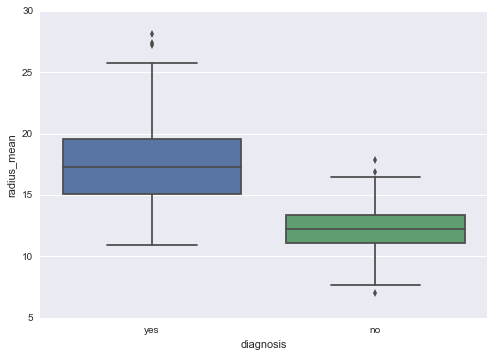

In [74]:
ax = sns.boxplot(x="diagnosis", y="radius_mean", data=data)

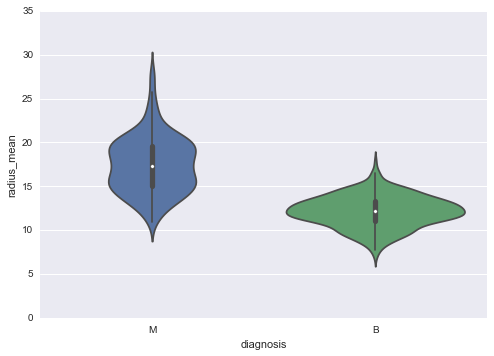

In [764]:
sns.violinplot(x="diagnosis", y="radius_mean", data=data, size=6)

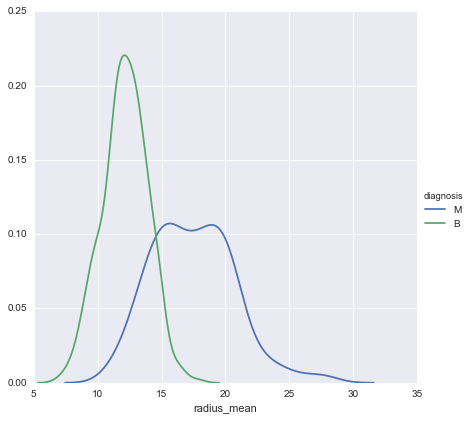

In [770]:
sns.FacetGrid(data, hue="diagnosis", size=6) \
   .map(sns.kdeplot, "radius_mean") \
   .add_legend()

** Effect of symmetry_worst **

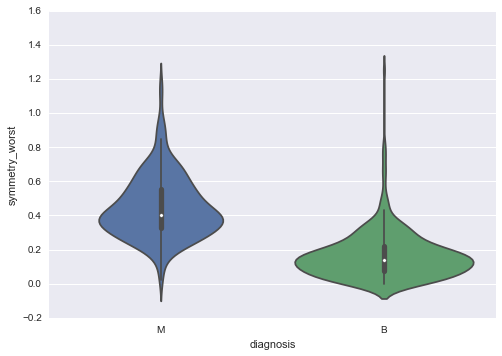

In [766]:
sns.violinplot(x="diagnosis", y="symmetry_worst", data=data, size=6)

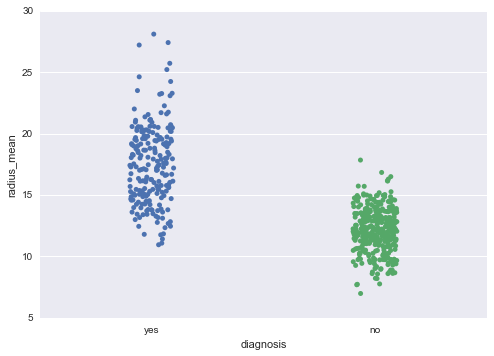

In [73]:
ax = sns.stripplot(x="diagnosis", y="radius_mean", data=data, jitter=True, edgecolor="gray")

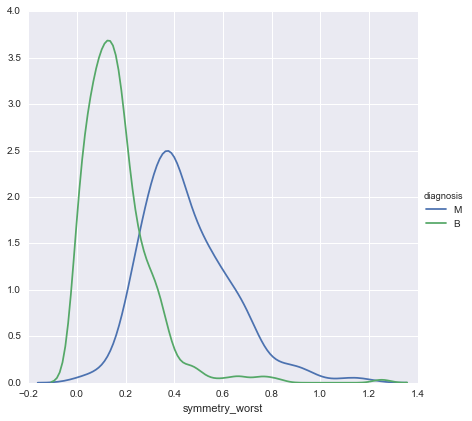

In [769]:
sns.FacetGrid(data, hue="diagnosis", size=6) \
   .map(sns.kdeplot, "symmetry_worst") \
   .add_legend()

 ### We see a clear seperation between malignant and benign cancer.

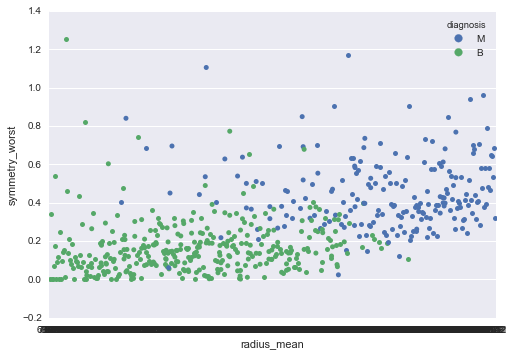

In [780]:
sns.swarmplot(x="radius_mean", y="symmetry_worst", data=data, hue="diagnosis");

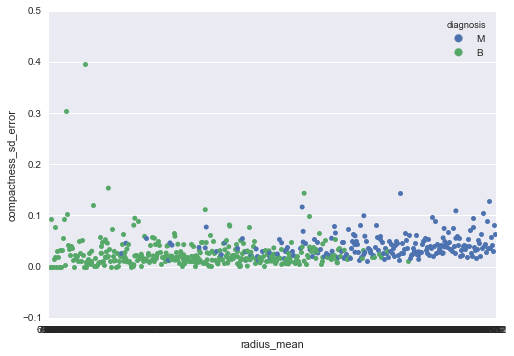

In [782]:
sns.swarmplot(x="radius_mean", y="compactness_sd_error", data=data, hue="diagnosis");

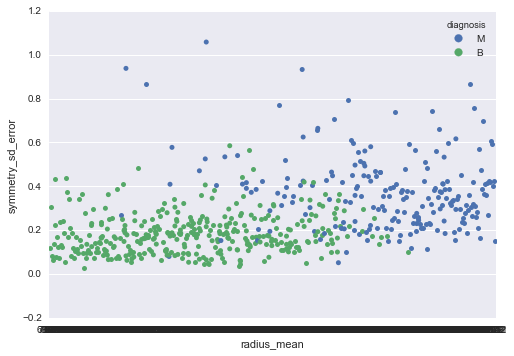

In [13]:
sns.swarmplot(x="radius_mean", y="symmetry_sd_error", data=data, hue="diagnosis");

* Joint Plot

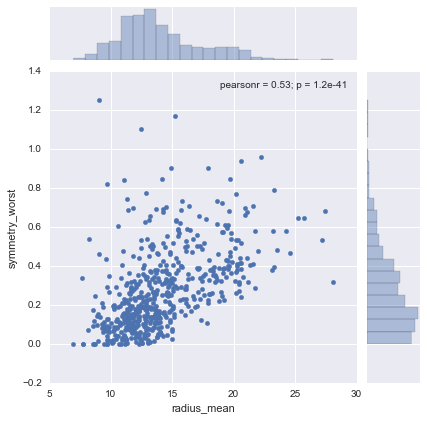

In [16]:
sns.jointplot(x="radius_mean", y="symmetry_worst", data=data)

* Correlation plot

D:\Anaconda3\lib\site-packages\seaborn\linearmodels.py:1285: UserWarning: The `corrplot` function has been deprecated in favor of `heatmap` and will be removed in a forthcoming release. Please update your code.
  warnings.warn(("The `corrplot` function has been deprecated in favor "
D:\Anaconda3\lib\site-packages\seaborn\linearmodels.py:1351: UserWarning: The `symmatplot` function has been deprecated in favor of `heatmap` and will be removed in a forthcoming release. Please update your code.
  warnings.warn(("The `symmatplot` function has been deprecated in favor "


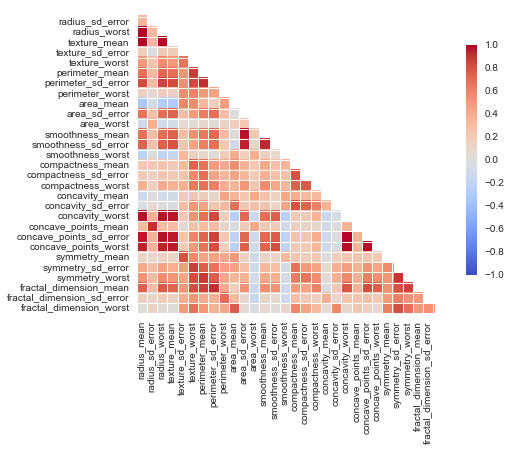

In [755]:
sns.corrplot(data, annot=False, diag_names=False)

### Seperate Features and Target
The parameter to be predicted is the column **diagnosis**- which is beingn(B) or malignant(M).

In [27]:
# Extract feature columns
feature_cols = list(data.columns[1:31])

# Extract target column 'passed'
target_col = data.columns[-0] 

# Show the list of columns
print( "Feature columns:\n{}".format(feature_cols))
print ("\nTarget column: {}".format(target_col))

# Separate the data into feature data and target data (X_all and y_all, respectively)
X_all = data[feature_cols]
y_all = data[target_col]

Feature columns:
['radius_mean', 'radius_sd_error', 'radius_worst', 'texture_mean', 'texture_sd_error', 'texture_worst', 'perimeter_mean', 'perimeter_sd_error', 'perimeter_worst', 'area_mean', 'area_sd_error', 'area_worst', 'smoothness_mean', 'smoothness_sd_error', 'smoothness_worst', 'compactness_mean', 'compactness_sd_error', 'compactness_worst', 'concavity_mean', 'concavity_sd_error', 'concavity_worst', 'concave_points_mean', 'concave_points_sd_error', 'concave_points_worst', 'symmetry_mean', 'symmetry_sd_error', 'symmetry_worst', 'fractal_dimension_mean', 'fractal_dimension_sd_error', 'fractal_dimension_worst']

Target column: diagnosis


In [28]:
# Diagnosis is stored in results
results=data.ix[:,0]

# Diagnosis is dropped
data.drop(data.columns[0],axis=1,inplace=True)

### Implementation: Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In the code block below, the following is implemented:
 - Assign the value of the 25th percentile for the given feature to `Q1`. Use `np.percentile` for this.
 - Assign the value of the 75th percentile for the given feature to `Q3`. Again, use `np.percentile`.
 - Assign the calculation of an outlier step for the given feature to `step`.
 - Optionally remove data points from the dataset by adding indices to the `outliers` list.

**NOTE:** If you choose to remove any outliers, ensure that the sample data does not contain any of these points!  
Once you have performed this implementation, the dataset will be stored in the variable `good_data`.

In [217]:
# For each feature find the data points with extreme high or low values
index=[]
for feature in data.keys():
    
    # : Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(data[feature], 25,axis=0) 
    # : Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(data[feature], 75,axis=0)
    # : Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = (Q3-Q1) *1.5
    # Display the outliers
    #print ("Data points considered outliers for the feature '{}':".format(feature))
    #display(data[~((data[feature] >= Q1 - step) & (data[feature] <= Q3 + step))])
    index.append(data[~((data[feature] >= Q1 - step) & (data[feature] <= Q3 + step))].index)
    
# OPTIONAL: Select the indices for data points you wish to remove
import collections

## Append Outliers for each feature to a single list
all=index[0].tolist()+index[1].tolist() +index[2].tolist()+index[3].tolist()+index[4].tolist()+index[5].tolist()

#  Identify common rows for outliers
outliers= ([item for item, count in collections.Counter(all).items() if count > 1])

# too many ouliers found so outliers set to[]
outliers=[]

# Remove the outliers, if any were specified
good_data = data.drop(data.index[outliers]).reset_index(drop = True)

### Removing outlier rows (Rows that have more than 2 outliers)

In [221]:
outliers=([item for item, count in collections.Counter(all).items() if count > 2],)
display(outliers)
good_data = data.drop(data.index[outliers]).reset_index(drop = True)

([107, 179, 520, 163, 201, 460, 81, 338, 211, 121, 351, 235, 368, 502],)

### PCA

We can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. 

In the code block below, the following is implemented:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of the data

In [234]:
from sklearn.decomposition import PCA
data=good_data
pca = PCA()
pca_results=pca.fit(data)
# Print the components and the amount of variance in the data contained in each dimension
print( 'PCA components:\n{}'.format(pca.components_[:,0]))
type(pca.components_[:,0])
print(' PCA explained variance ratio:\n{}'.format(pca.explained_variance_ratio_[:4]*100))

PCA components:
[ -5.33800007e-03   1.08475225e-02   7.45464815e-03   1.67997745e-02
   3.74247869e-02   1.20987046e-01   2.73497691e-02   1.50365694e-01
  -3.37022874e-01   6.96314789e-02  -3.98736848e-01   7.53415785e-01
  -2.31238180e-01   7.25790223e-02  -1.42197339e-01  -1.23441965e-01
   3.90967588e-02   7.83785818e-02   1.68835110e-02   9.02919357e-02
   6.06355445e-02   7.40039023e-03   2.22245902e-03   3.10212787e-02
   5.71022551e-03   1.09427556e-04   3.50849729e-03   3.13442673e-03
   5.79256025e-04   5.31364208e-04]


numpy.ndarray

 PCA explained variance ratio:
[  9.81402220e+01   1.75848832e+00   7.40563299e-02   1.55204904e-02]


### Explained variance by first two dimensions

In [186]:
pca.explained_variance_ratio_[0:10] *100

array([ 98.22980631,   1.59270546])

### Visualizing cumulative variance

<Container object of 4 artists>

(0, 1.05)

([<matplotlib.axis.XTick at 0x393f1320>,
 <a list of 4 Text xticklabel objects>)

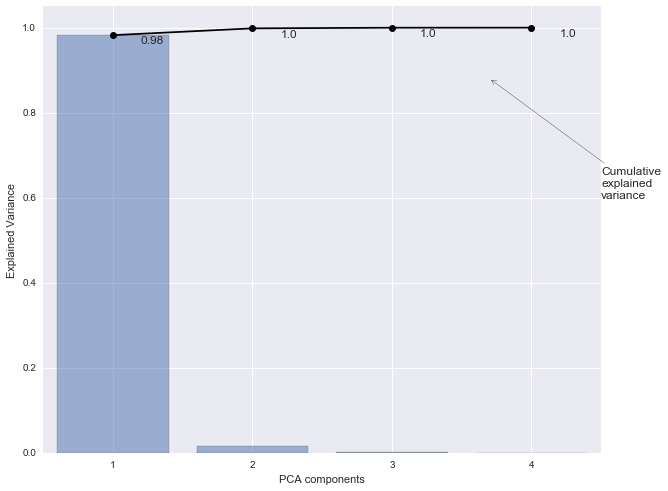

In [231]:
plt.figure(figsize=(10,8))

# create an x-axis variable for each pca component
x = np.arange(1,5)

# plot the cumulative variance
plt.plot(x, np.cumsum(pca.explained_variance_ratio_[0:4]), '-o', color='black')

# plot the components' variance
plt.bar(x, pca.explained_variance_ratio_[0:4], align='center', alpha=0.5)

# plot styling
plt.ylim(0, 1.05)
plt.annotate('Cumulative\nexplained\nvariance',
             xy=(3.7, .88), arrowprops=dict(arrowstyle='->'), xytext=(4.5, .6))
for i,j in zip(x, np.cumsum(pca.explained_variance_ratio_[0:4])):
    plt.annotate(str(j.round(2)),xy=(i+.2,j-.02))
plt.xticks(range(1,5))
plt.xlabel('PCA components')
plt.ylabel('Explained Variance')
plt.show()


**Interpretation:**
The data can be collapsed to one dimension from 31 dimensions to retain 98% variance

### Clustering

K-Means clustering algorithm was used  to identify the various segments hidden in the data

In [188]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

#  Apply KNN to the reduced data 
clusterer = KMeans(n_clusters=2,random_state=1)

#  Predict the cluster for each data point
#clusterer.fit(reduced_data)
preds =clusterer.fit_predict(reduced_data)

#  Find the cluster centers
centers = clusterer.cluster_centers_

#  Calculate the mean silhouette coefficient for the number of clusters chosen
score = silhouette_score(reduced_data,preds)
print(" The Score is {}".format(score))


 The Score is 0.6984177173911995


* Best Cluster Size is determined through silhouette score
* Determining Silhouette Score for 1-20 clusters 

In [236]:
#Determining Silhouette Score for 1-20 clusters
silhouette=[]
for n in range(2,20):
    clusterer = KMeans(n_clusters=n, random_state=10)
    clusterer = clusterer.fit_predict(reduced_data)
    silhouette.append(silhouette_score(reduced_data, clusterer))

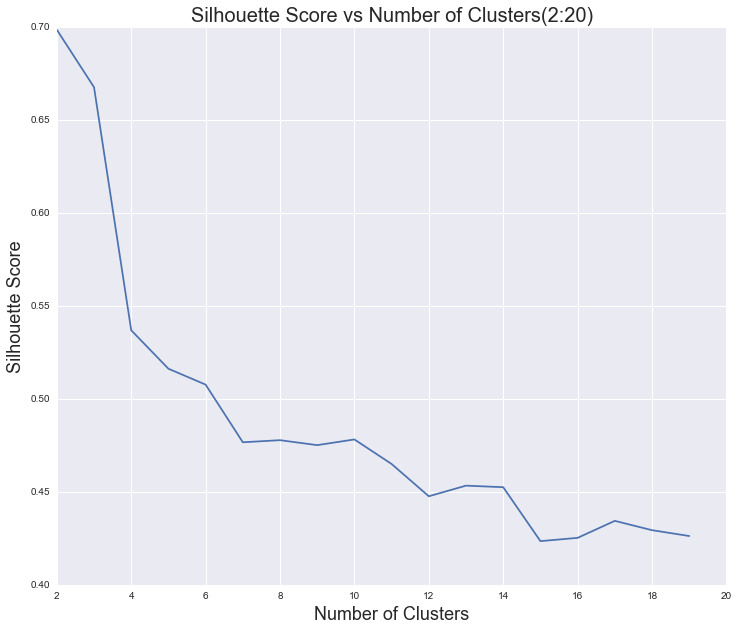

In [237]:
plt.figure(figsize=(12,10))
plt.plot(list(range(2,20)),silhouette)
plt.ylabel('Silhouette Score', fontsize=18)
plt.xlabel('Number of Clusters', fontsize=18)
plt.title('Silhouette Score vs Number of Clusters(2:20)', fontsize=20)

* Best Cluster Size is 2. This confirms the presence of two clusters - Benign and Malignant Cancer

### Sampling points from the Data to see where they fall in the clusters
 5 of the points are Benign 

 1 is Malignant 

In [273]:
# Choose 5 points
indices = [20,50,100,200,300,500]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
print ("Chosen samples of Breast Cancer dataset:")
display(samples)

#Transform Samples
pca_samples = pca.transform(samples)

Chosen samples of Breast Cancer dataset:


,"(radius_mean,)","(radius_sd_error,)","(radius_worst,)","(texture_mean,)","(texture_sd_error,)","(texture_worst,)","(perimeter_mean,)","(perimeter_sd_error,)","(perimeter_worst,)","(area_mean,)",...,"(concavity_worst,)","(concave_points_mean,)","(concave_points_sd_error,)","(concave_points_worst,)","(symmetry_mean,)","(symmetry_sd_error,)","(symmetry_worst,)","(fractal_dimension_mean,)","(fractal_dimension_sd_error,)","(fractal_dimension_worst,)"
0,9.504,12.44,60.34,273.9,0.10240,0.06492,0.029560,0.020760,0.1815,0.06905,...,10.23,15.66,65.13,314.9,0.1324,0.11480,0.08867,0.06227,0.2450,0.07773
1,13.640,16.34,87.21,571.8,0.07685,0.06059,0.018570,0.017230,0.1353,0.05953,...,14.67,23.19,96.08,656.7,0.1089,0.15820,0.10500,0.08586,0.2346,0.08025
2,12.180,20.52,77.22,458.7,0.08013,0.04038,0.023830,0.017700,0.1739,0.05677,...,13.34,32.84,84.58,547.8,0.1123,0.08862,0.11450,0.07431,0.2694,0.06878
3,17.010,20.26,109.70,904.3,0.08772,0.07304,0.069500,0.053900,0.2026,0.05223,...,19.80,25.05,130.00,1210.0,0.1111,0.14860,0.19320,0.10960,0.3275,0.06469
4,13.050,13.84,82.71,530.6,0.08352,0.03735,0.004559,0.008829,0.1453,0.05518,...,14.73,17.40,93.96,672.4,0.1016,0.05847,0.01824,0.03532,0.2107,0.06580
5,15.050,19.07,97.26,701.9,0.09215,0.08597,0.074860,0.043350,0.1561,0.05915,...,17.58,28.06,113.80,967.0,0.1246,0.21010,0.28660,0.11200,0.2282,0.06954


### Visualizing  the Two Clusters

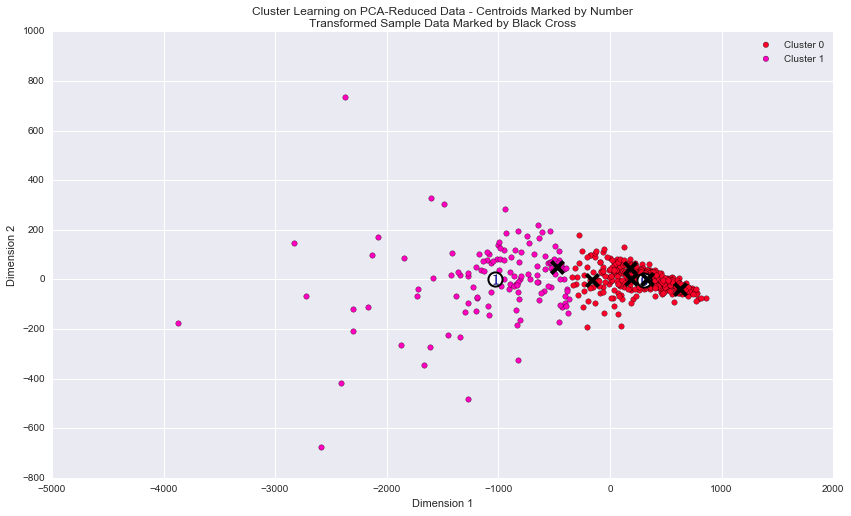

In [274]:
import renders as rs
# Display the results of the clustering from implementation
clusterer = KMeans(n_clusters=2, random_state=10)
preds =clusterer.fit_predict(reduced_data)
centers=clusterer.cluster_centers_
rs.cluster_results(reduced_data, preds, centers,pca_samples)

K-Means cluster was able to correctly identify the class of all the 6 points.

5 'x' are in Benign

1 'x' is in  Malignant


Category of the 5 chosen points:

In [24]:
results[200]
results[100]
results[300]
results[400]
results[50]
results[20]

'M'

'B'

'B'

'B'

'B'

'B'

* The Red cluster represnts the Benign Cancer
* The Magenta Cluster represnts Malignant Cancer.

### CLASSIFICATION
* Performance metric- F1 Score
* Models used:
     * Logistic Regression
     * SVC
     * KNN
     * Ada Boost

### Implementation: Training and Testing Data Split

- Randomly shuffle and split the data (`X_all`, `y_all`) into training and testing subsets.
  - Use 400 training points  and 168 testing points 
  - Store the results in `X_train`, `X_test`, `y_train`, and `y_test`

In [39]:
#  Import any additional functionality you may need here
from sklearn import cross_validation
from sklearn.metrics import accuracy_score
from time import time
#  Set the number of training points
num_train=400

# Set the number of testing points
num_test = X_all.shape[0] - num_train

#  Shuffle and split the dataset into the number of training and testing points above
rs = cross_validation.ShuffleSplit(568, n_iter=1,test_size=num_test, random_state=0)
for train_index, test_index in rs:
   # print("TRAIN:", train_index, "TEST:", test_index)
    X_train = X_all.loc[train_index,]
    X_test = X_all.loc[test_index,]
    y_train = y_all.loc[train_index,]
    y_test = y_all.loc[test_index,]
    
    
#X_train,X_test,y_train,y_test=train_test_split(X_all,y_all,test_size=num_train,random_state=4)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print ("Testing set has {} samples.".format(X_test.shape[0]))

#y_train.index

Training set has 400 samples.
Testing set has 168 samples.


In [76]:
### Functions for classification

In [40]:
def train_classifier(clf, X_train, y_train):
    ''' Fits a classifier to the training data. '''
    clf.fit(X_train, y_train)
   
    
def predict_labels(clf, features, target):
    ''' Makes predictions using a fit classifier based on F1 score. '''
    y_pred = clf.predict(features)
    return f1_score(target.values, y_pred, pos_label='yes')


def train_predict(clf, X_train, y_train, X_test, y_test):
    ''' Train and predict using a classifer based on F1 score. '''
    
    # Indicate the classifier and the training set size
    print ("Training a {} using a training set size of {}. . .".format(clf.__class__.__name__, len(X_train)))
    
    # Train the classifier
    train_classifier(clf, X_train, y_train)
    
    # Print the results of prediction for both training and testing
    print ("F1 score for training set: {:.4f}.".format(predict_labels(clf, X_train, y_train)))
    print ("F1 score for test set: {:.4f}.".format(predict_labels(clf, X_test, y_test)))
    

In [41]:
# : Import the four supervised learning models from sklearn

# from sklearn import model_A
from sklearn.linear_model import LogisticRegression

# from sklearn import model_B
from sklearn.svm import SVC

# from skearln import model_C
from sklearn.neighbors import KNeighborsClassifier

# from skearln import model_D
from sklearn.ensemble import AdaBoostClassifier


from sklearn.cross_validation import cross_val_score

# : Initialize the four models
clf_A = LogisticRegression()
clf_B = SVC()
clf_C = KNeighborsClassifier(n_neighbors=25,weights='uniform')
clf_D = AdaBoostClassifier(n_estimators=3)


X_train_400 = X_train[:400]
y_train_400 = y_train[:400]

In [42]:
y_all[y_all=='B']='no'
y_all[y_all=='M']='yes'

D:\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
D:\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


Learning curve: to identify overfiiting

In [62]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and traning learning curve.

    Parameters
    ----------
    estimator : object type that implements the "fit" and "predict" methods
        An object of that type which is cloned for each validation.

    title : string
        Title for the chart.

    X : array-like, shape (n_samples, n_features)
        Training vector, where n_samples is the number of samples and
        n_features is the number of features.

    y : array-like, shape (n_samples) or (n_samples, n_features), optional
        Target relative to X for classification or regression;
        None for unsupervised learning.

    ylim : tuple, shape (ymin, ymax), optional
        Defines minimum and maximum yvalues plotted.

    cv : integer, cross-validation generator, optional
        If an integer is passed, it is the number of folds (defaults to 3).
        Specific cross-validation objects can be passed, see
        sklearn.cross_validation module for the list of possible objects

    n_jobs : integer, optional
        Number of jobs to run in parallel (default 1).
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt


In [77]:
### Classifying without Model Tuning

In [60]:
train_predict(clf_A,X_train_400 ,y_train_400, X_test, y_test)
train_predict(clf_B,X_train_400 ,y_train_400, X_test, y_test)
train_predict(clf_C,X_train_400 ,y_train_400, X_test, y_test)

Training a LogisticRegression using a training set size of 400. . .
F1 score for training set: 0.9467.
F1 score for test set: 0.9217.
Training a SVC using a training set size of 400. . .
F1 score for training set: 1.0000.
F1 score for test set: 0.0000.
Training a KNeighborsClassifier using a training set size of 400. . .
F1 score for training set: 0.8982.
F1 score for test set: 0.8624.


D:\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1074: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


### Grid Search Logistic Regression

In [46]:
from sklearn import grid_search
from sklearn.metrics import f1_score

clf_A1=grid_search.GridSearchCV(cv=10,estimator=LogisticRegression(C=1.0,penalty='l2'),
       param_grid={'C':[0.01,0.02,0.03,0.04,0.05,0.5,0.725,0.712,0.723,0.727,1,1000]},n_jobs=-1)
clf_A1.fit(X_train,y_train)
print (clf_A1.best_params_)
print (clf_A1.best_score_)
train_predict(clf_A1, X_train, y_train, X_test, y_test)

GridSearchCV(cv=10, error_score='raise',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'C': [0.01, 0.02, 0.03, 0.04, 0.05, 0.5, 0.725, 0.712, 0.723, 0.727, 1, 1000]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

{'C': 1000}
0.9675
Training a GridSearchCV using a training set size of 400. . .
F1 score for training set: 0.9701.
F1 score for test set: 0.9298.


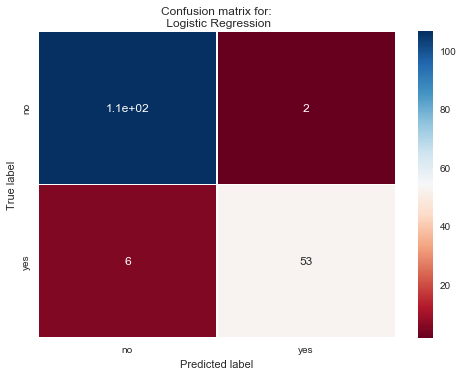

In [618]:
from sklearn.metrics import confusion_matrix

# Compute confusion matrix for a model
model = clf_A1
cm = confusion_matrix(y_test.values, model.predict(X_test))

# view with a heatmap
sns.heatmap(cm, annot=True, cmap='RdBu', xticklabels=['no', 'yes'], yticklabels=['no', 'yes'], linewidth=.5)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion matrix for:\n{}'.format(" Logistic Regression"));

### Grid Search SVC

In [51]:
param_grids = {"kernel":['rbf'],
               'gamma': [ 1e-4, 1e-5, 1e-6],
               'C': [1, 400, 500, 600, 700],
               }

clf_B1 = GridSearchCV(SVC(), param_grid= param_grids, cv=10,n_jobs= -1)
clf_B1.fit(X_train,y_train)
train_predict(clf_B1,X_train_400 ,y_train_400, X_test, y_test)

GridSearchCV(cv=10, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'gamma': [0.0001, 1e-05, 1e-06], 'kernel': ['rbf'], 'C': [1, 400, 500, 600, 700]},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

Training a GridSearchCV using a training set size of 400. . .
F1 score for training set: 0.9705.
F1 score for test set: 0.9464.


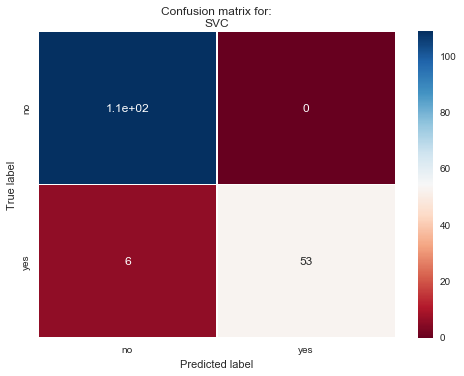

In [55]:
# Compute confusion matrix for a model
model = clf_B1
cm = confusion_matrix(y_test.values, model.predict(X_test))

# view with a heatmap
sns.heatmap(cm, annot=True, cmap='RdBu', xticklabels=['no', 'yes'], yticklabels=['no', 'yes'], linewidth=.5)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion matrix for:\n{}'.format("SVC"))

### Grid Search KNN

In [48]:
from sklearn.grid_search import GridSearchCV
k_range=list(range(1,31))
weight_options=['uniform','distance']
param_grid = dict(n_neighbors=k_range, weights=weight_options)
clf_C1=GridSearchCV(clf_C,param_grid=param_grid,cv=10,scoring='accuracy',n_jobs=-1)
clf_C1.fit(X_train,y_train)
train_predict(clf_C1, X_train, y_train, X_test, y_test)

GridSearchCV(cv=10, error_score='raise',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=25, p=2,
           weights='uniform'),
       fit_params={}, iid=True, n_jobs=-1,
       param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30], 'weights': ['uniform', 'distance']},
       pre_dispatch='2*n_jobs', refit=True, scoring='accuracy', verbose=0)

Training a GridSearchCV using a training set size of 400. . .
F1 score for training set: 0.9226.
F1 score for test set: 0.8947.


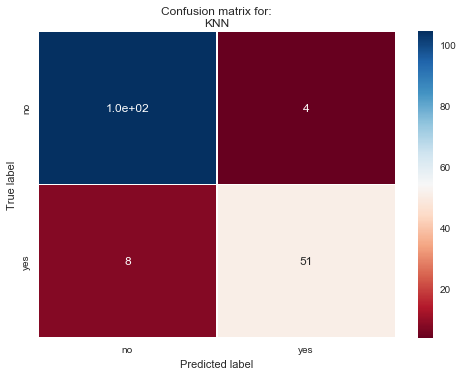

In [49]:
model = clf_C1
cm = confusion_matrix(y_test.values, model.predict(X_test))

# view with a heatmap
sns.heatmap(cm, annot=True, cmap='RdBu', xticklabels=['no', 'yes'], yticklabels=['no', 'yes'], linewidth=.5)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion matrix for:\n{}'.format("KNN"));

### Grid Search Ada Boost

In [56]:
from sklearn.ensemble import AdaBoostClassifier
clf_D1 = AdaBoostClassifier(n_estimators=3)
print (clf_D1)
train_predict(clf_D1, X_train, y_train, X_test, y_test)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=3, random_state=None)
Training a AdaBoostClassifier using a training set size of 400. . .
F1 score for training set: 0.9571.
F1 score for test set: 0.9322.


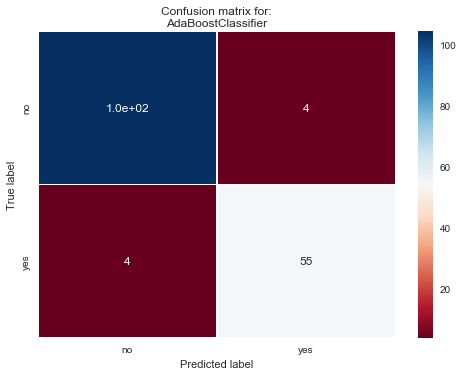

In [57]:
from sklearn.metrics import confusion_matrix

# Compute confusion matrix for a model
model = clf_D1
cm = confusion_matrix(y_test.values, model.predict(X_test))

# view with a heatmap
sns.heatmap(cm, annot=True, cmap='RdBu', xticklabels=['no', 'yes'], yticklabels=['no', 'yes'], linewidth=.5)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion matrix for:\n{}'.format(model.__class__.__name__));

### PLOTTING LEARNING CURVES

<module 'matplotlib.pyplot' from 'D:\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

<module 'matplotlib.pyplot' from 'D:\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

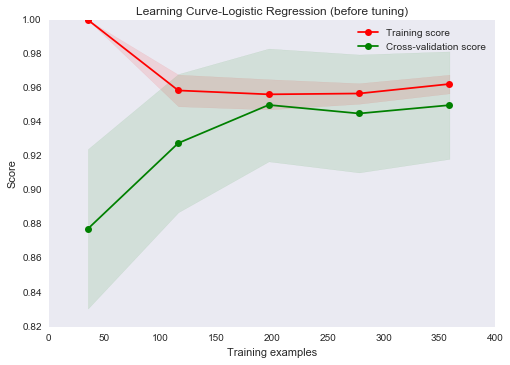

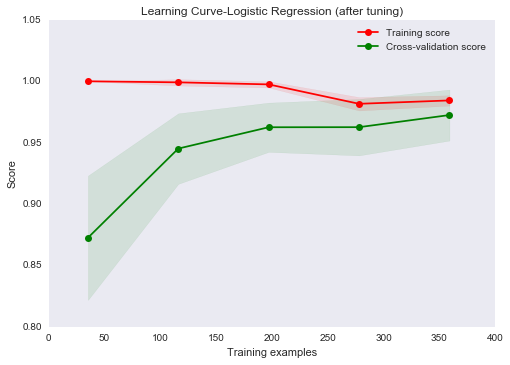

In [69]:
from sklearn.learning_curve import learning_curve
plot_learning_curve(LogisticRegression(),X= X_train.values, y= y_train.values,title= 'Learning Curve-Logistic Regression (before tuning)',cv=10)
plot_learning_curve(clf_A1.best_estimator_,X= X_train.values, y= y_train.values,title= 'Learning Curve-Logistic Regression (after tuning)',cv=10)

<module 'matplotlib.pyplot' from 'D:\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

<module 'matplotlib.pyplot' from 'D:\\Anaconda3\\lib\\site-packages\\matplotlib\\pyplot.py'>

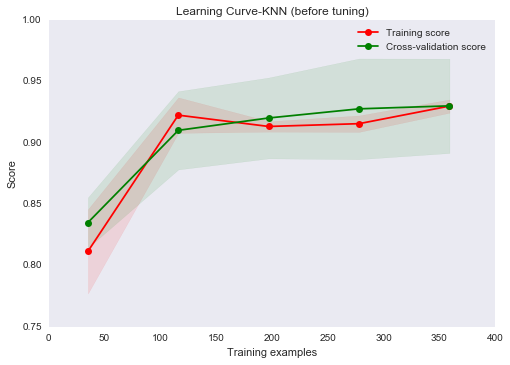

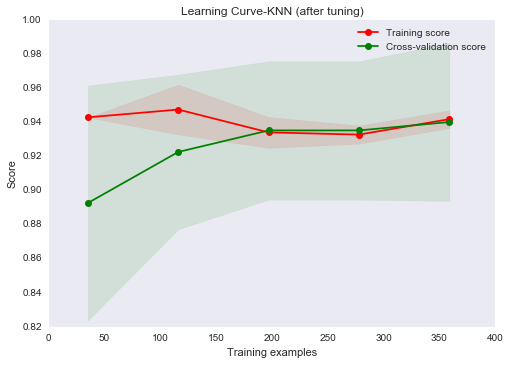

In [71]:
plot_learning_curve( KNeighborsClassifier(n_neighbors=25,weights='uniform'),X= X_train.values, y= y_train.values,title= 'Learning Curve-KNN (before tuning)',cv=10)
plot_learning_curve(clf_C1.best_estimator_,X= X_train.values, y= y_train.values,title= 'Learning Curve-KNN (after tuning)',cv=10)

### Visualize Logistic Regression Coefficents

In [615]:
# helper function for top n coefficients of the logistic regression model
def visualize_coefficients(classifier, feature_names, n_features=10):
    # get coefficients with large absolute values 
    coef = classifier.coef_.ravel()
    pos_coeffs = np.argsort(coef)[-n_features:]
    neg_coeffs = np.argsort(coef)[:n_features]
    hmm_coeffs = np.hstack([neg_coeffs, pos_coeffs])
    
    # plot the coeefs
    plt.figure(figsize=(15, 5))
    colors = ["red" if c < 0 else "blue" for c in coef[hmm_coeffs]]
    plt.bar(np.arange(20), coef[hmm_coeffs], color=colors)
    feature_names = np.array(feature_names)
    plt.xticks(np.arange(1, 21), feature_names[hmm_coeffs], rotation=35, ha="right");

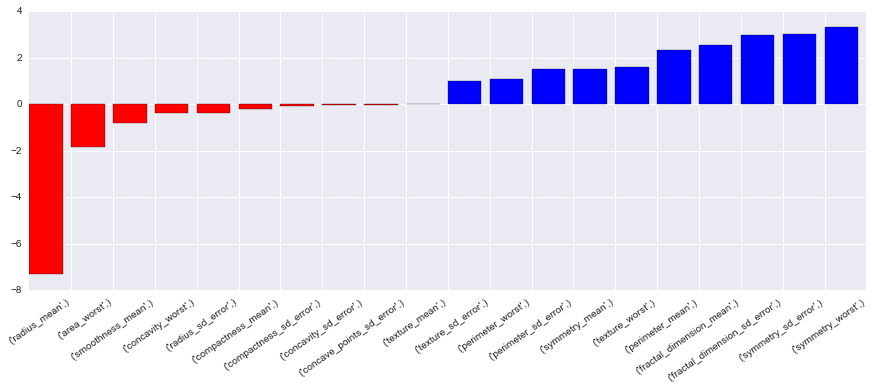

In [617]:
##look at the coeffs
est = clf_A1.best_estimator_
isualize_coefficients(est, X_train.columns)

**Interpretations:**
* The effect of each variable is proprtional to the height of individual  bars in the histogram. 
* High value of parameter in RED leads to Malignant cancer
* High value of parameter in BLUE leads to Benign cancer
* 'radius mean' had the highest negative effect
* 'symmetry worst' had the highest positiive effect

* Lead to Benign tumor:   
    * data.symmetry_worst
    * data.symmetry_sd_error



* Lead to Malignant tumor:
    * data.radius_mean
    * data.area_worst

** TABULATING PERFORMANCE**  

                   | Model (test)           | F1 Score (train)  | F1 Score (test) |
                   |  --------------------  | :--------------:  | :-------------: |
                   | Logistic               | 0.97              |  0.93           |
                   | SVC                    | 0.97              |  0.94           |
                   | KNN                    | 0.92              |  0.89           |
                   | AdaBoost               | 0.95              |  0.93           | 

* All the models perform relatively well since it is a relatively easy classification task
* Model tuning helped improved F1 score and reduce overfitting